# DESICION TREE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Data Preparation

In [ ]:
data=pd.read_excel("/content/drive/MyDrive/Assignments/DECISION TREE/heartdisease.xlsx")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


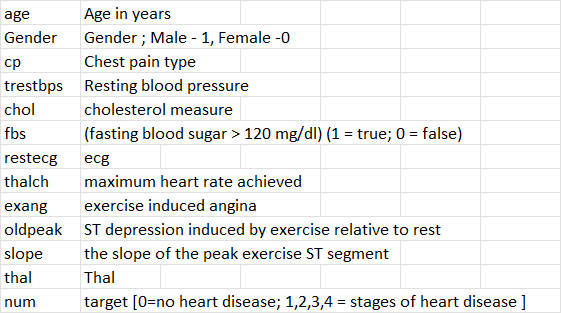

num is the target variable that is the classification

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
# we will know the descriptive statistics of all the data
data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
count,908.000000,908,908,908.000000,908.000000,908,908,908.000000,908,846.000000,908,908,908.000000
unique,NaN,2,4,NaN,NaN,2,3,NaN,4,NaN,3,3,NaN
top,NaN,Male,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,reversable defect,NaN
freq,NaN,718,495,NaN,NaN,723,542,NaN,516,NaN,453,358,NaN
mean,53.791850,NaN,NaN,133.430617,201.484581,NaN,NaN,135.957048,NaN,0.891253,NaN,NaN,1.008811
std,9.158031,NaN,NaN,20.401608,112.097949,NaN,NaN,26.804929,NaN,1.093875,NaN,NaN,1.144436
min,29.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,NaN,0.000000
25%,47.750000,NaN,NaN,120.000000,176.750000,NaN,NaN,118.000000,NaN,0.000000,NaN,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,224.000000,NaN,NaN,138.000000,NaN,0.500000,NaN,NaN,1.000000
75%,60.000000,NaN,NaN,144.000000,270.000000,NaN,NaN,156.000000,NaN,1.500000,NaN,NaN,2.000000


#### Exploratary Data Analysis

In [ ]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
data["cp"].unique()

array(['typical angina', 'atypical angina', 'asymptomatic', 'non-anginal'],
      dtype=object)

In [ ]:
data["fbs"].unique()

array([ True, False])

In [ ]:
data["restecg"].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [ ]:
data["exang"].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [ ]:
data["slope"].unique()

array(['downsloping', 'flat', 'upsloping'], dtype=object)

In [ ]:
data["thal"].unique()

array(['fixed defect', 'normal', 'reversable defect'], dtype=object)

In [ ]:
data[data.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num


- the data has no duplicate values in it

In [ ]:
# finding te null values present
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

- the attribute Old peak has 62 null values and to handle them we need understand about the attribute so that we can either remove those or we can either fill them

- the values in old peak are numerical and it relates something with stress between the St peaks and it is something important for detrmining the classification so lets handle the nll values by imputating the values in it through mean

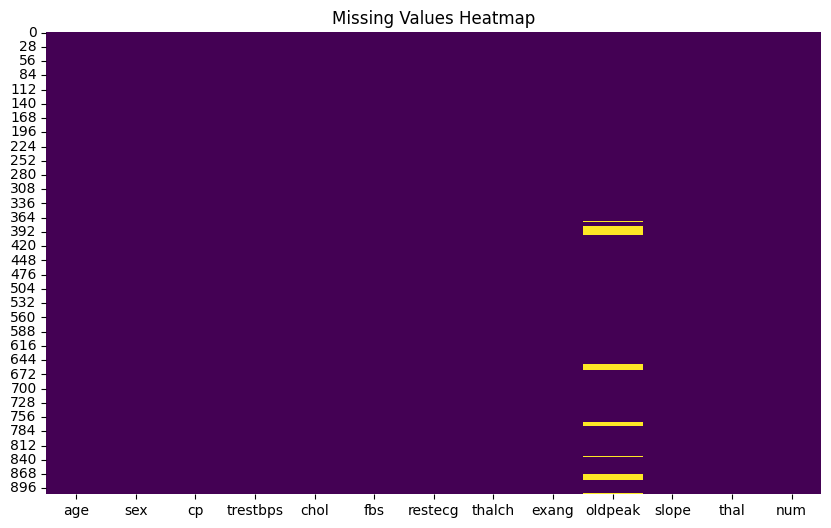

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
heart=data.copy()

In [ ]:
# fill the null values with the mean of the complete data
heart["oldpeak"].fillna(heart["oldpeak"].mean(),inplace=True)
print(heart.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


- Null values have been handled by filling them with the mean value of the data

- Know we will use the dataset **heart** for the furthur analysis

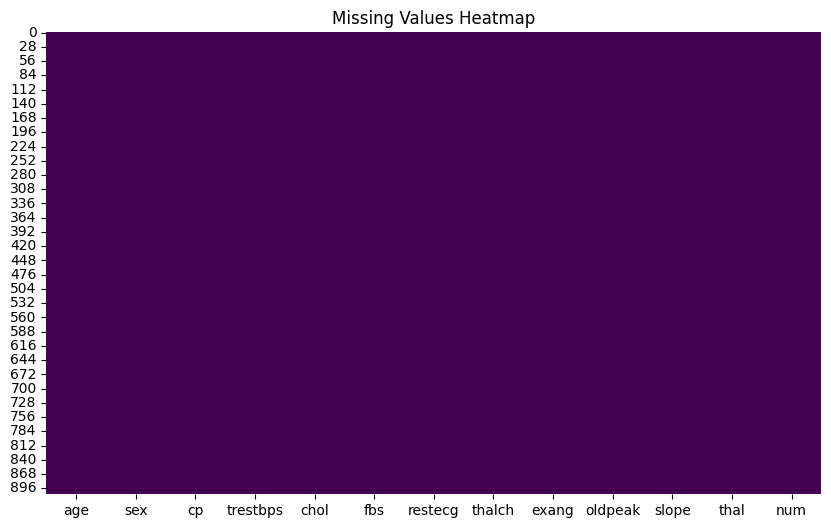

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(heart.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

####Visualizations

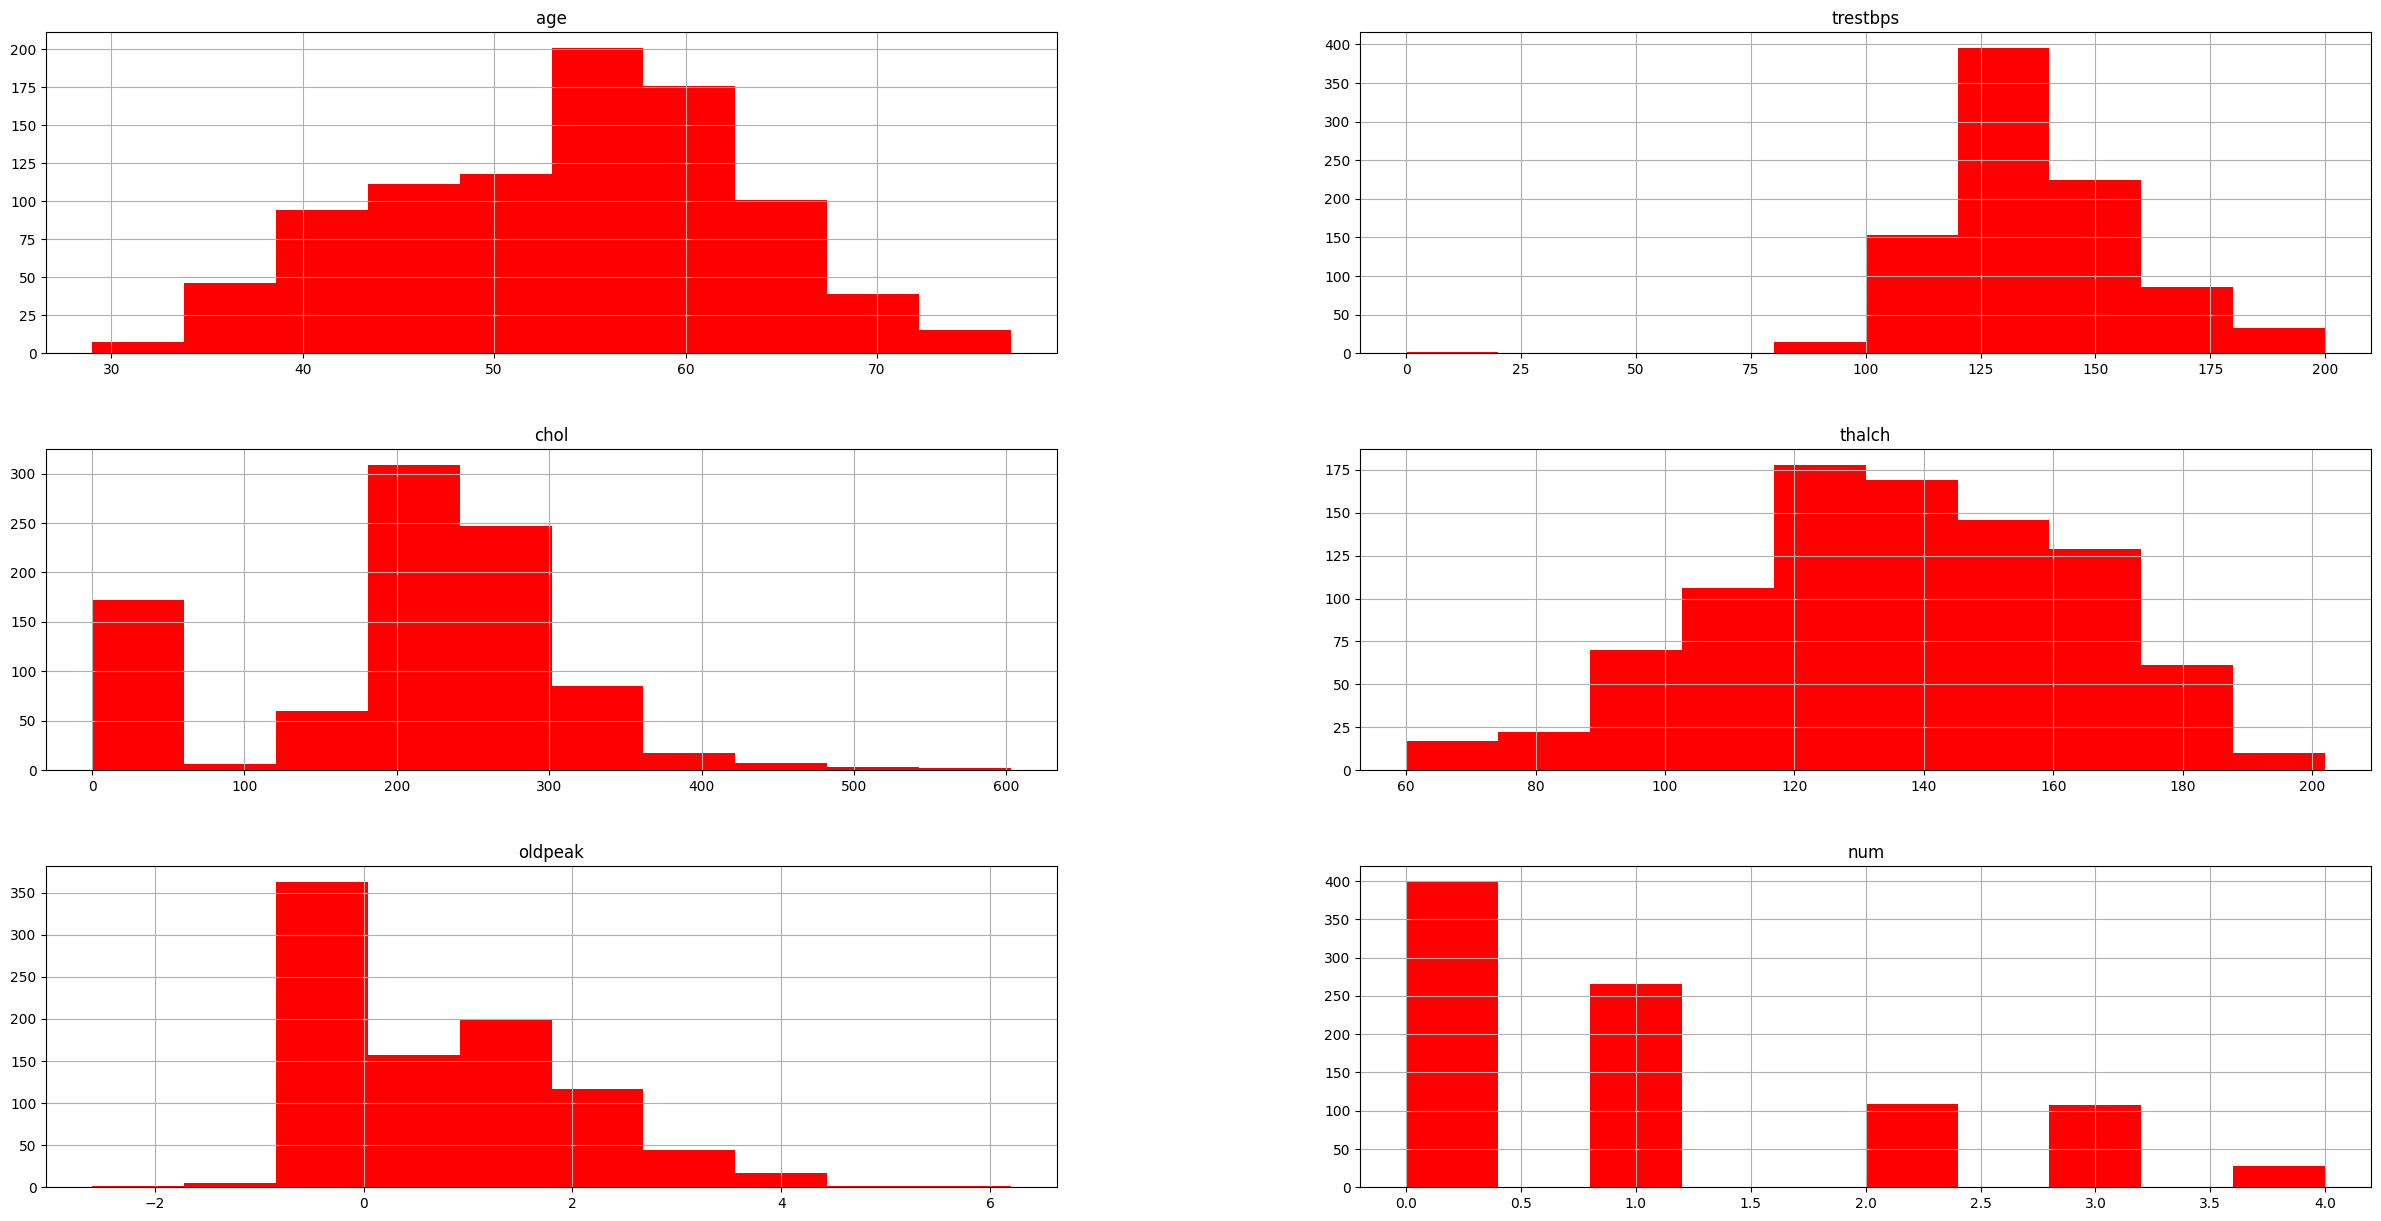

In [ ]:
# Plotting Histograms
heart.hist(figsize=(30,15), color='red')
plt.show()

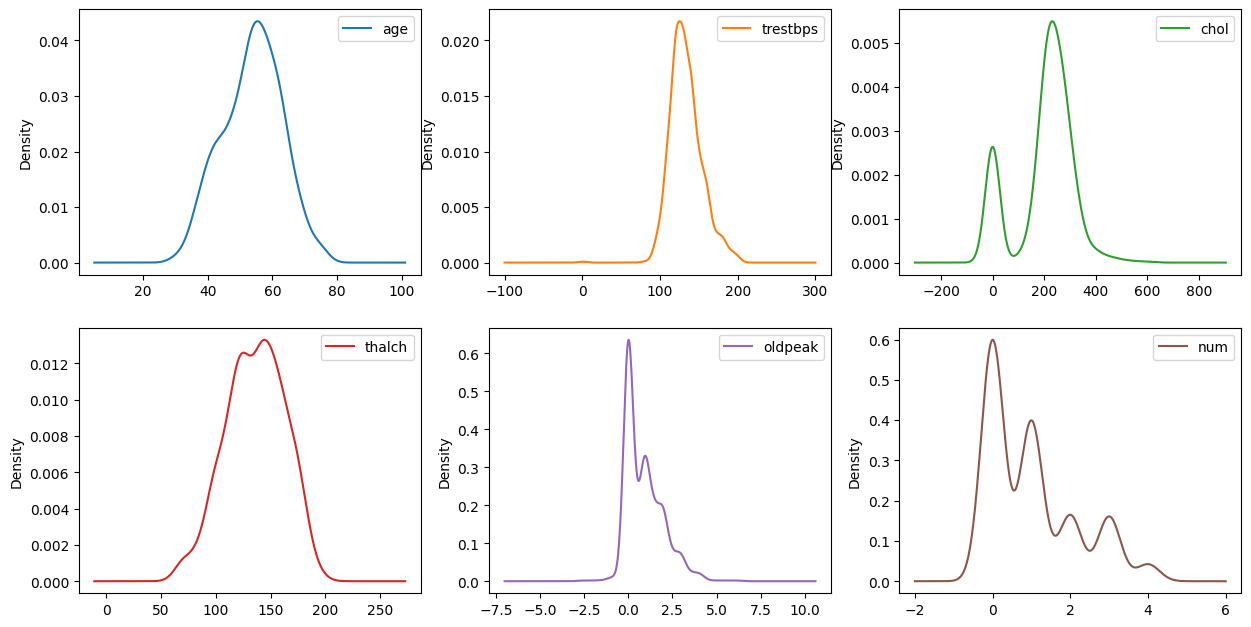

In [ ]:
heart.plot(kind='density', subplots=True, layout=(5, 3), figsize=(15, 20), sharex=False)
plt.show()

<Axes: >

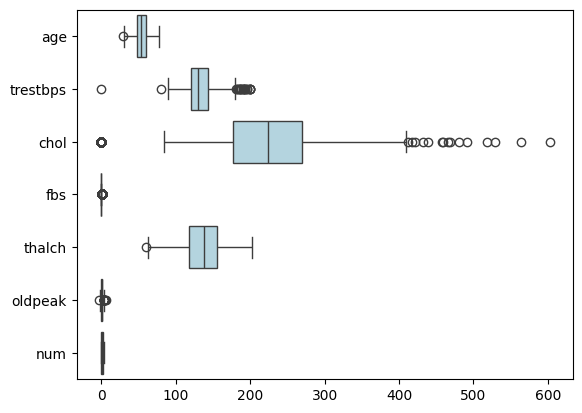

In [ ]:
sns.boxplot(data=heart, orient="h", color="lightblue")

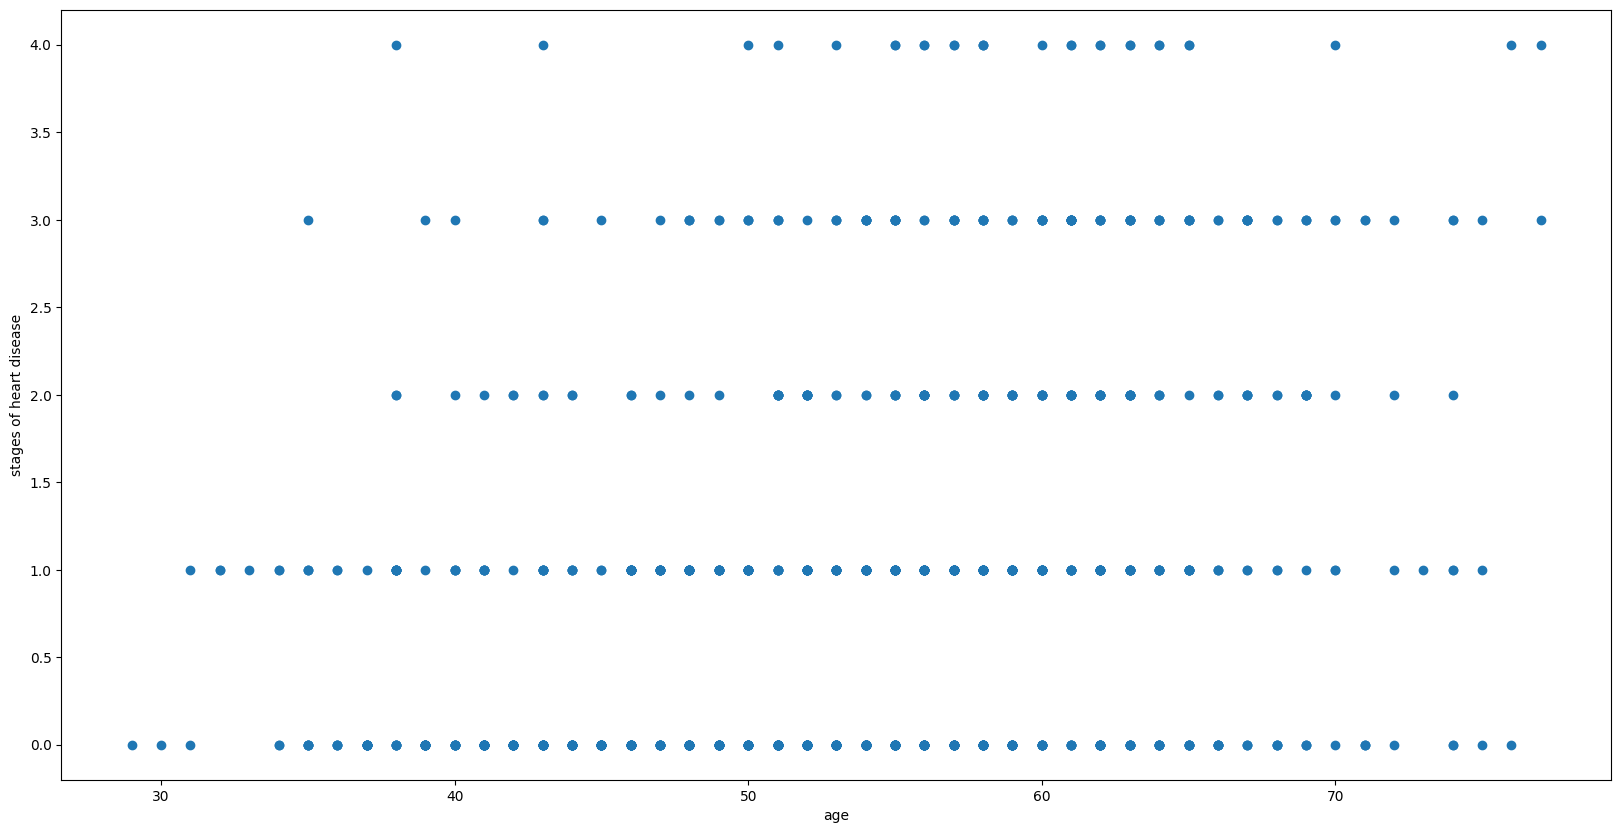

In [ ]:
import warnings
warnings.filterwarnings("ignore") #just to ignore any warnings
plt.figure(figsize=(20,10))
#sns.swarmplot(x="age",y="num",data=heart)
plt.scatter(x="age",y="num",data=heart)
plt.xlabel("age")
plt.ylabel("stages of heart disease")
plt.show()

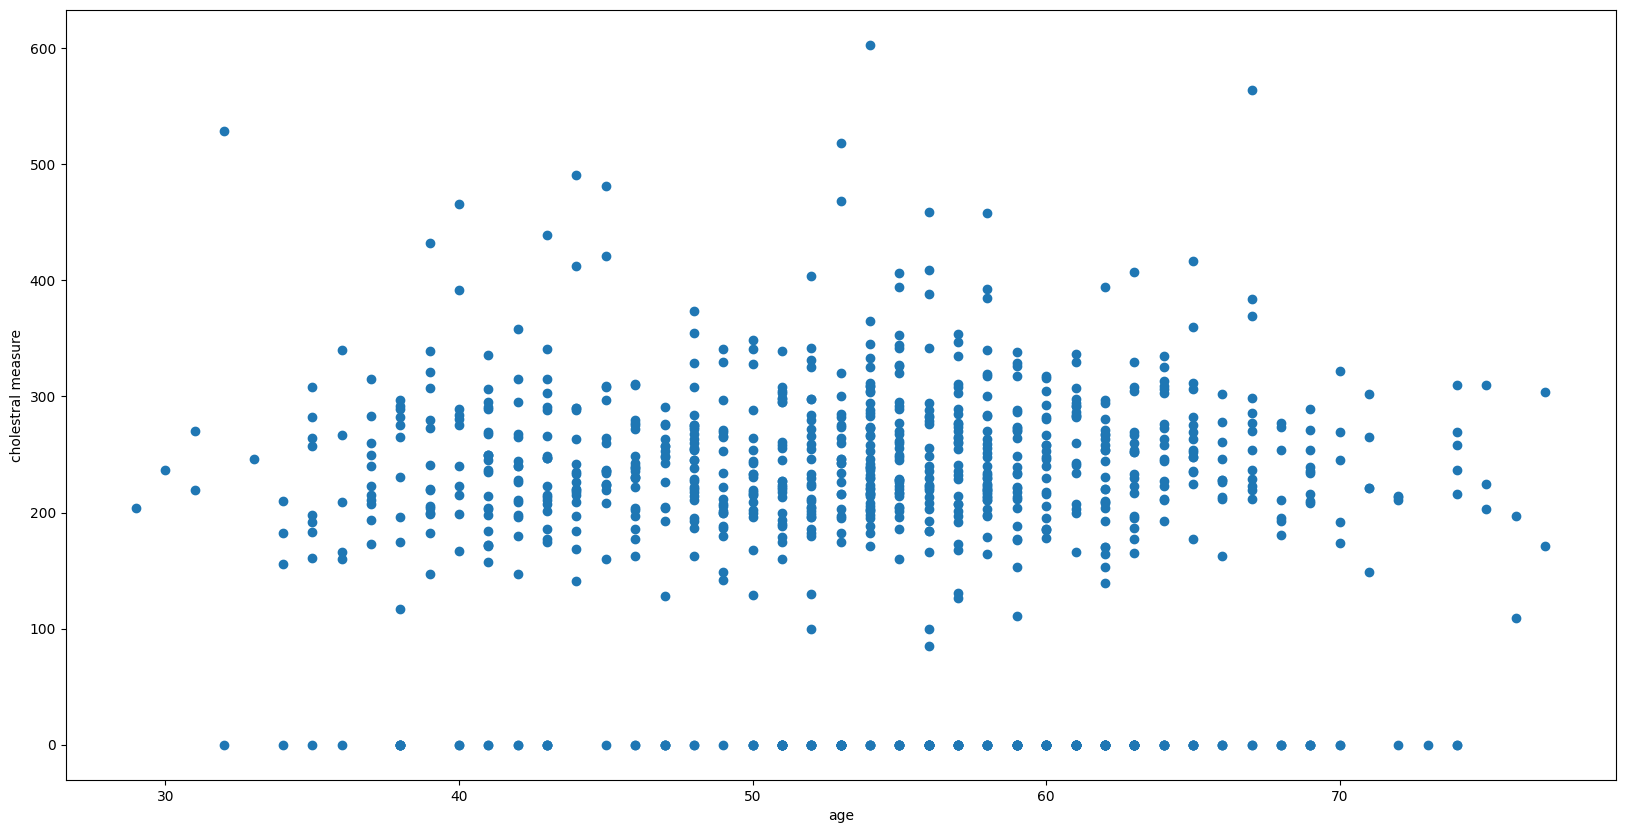

In [ ]:
plt.figure(figsize=(20,10))

plt.scatter(x="age",y="chol",data=heart)
plt.xlabel("age")
plt.ylabel("cholestral measure")
plt.show()

- Both the plots between **age - stage of heart disease** and **age - cholestral measure** have no significant relation

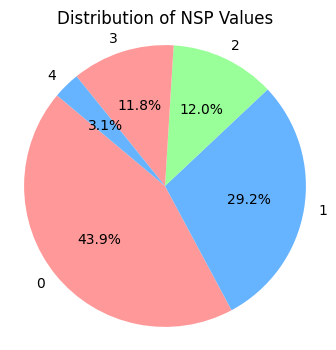

In [ ]:
num_counts = heart['num'].value_counts()

# Plot the pie chart
plt.figure(figsize=(4,4))
plt.pie(num_counts, labels=num_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of NSP Values')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

this pie chart shows us the percentage of people with the respective stage of heart disease, there are
- 43.9% with stage 0
- 29.2% with stage 1
- 12.0% with stage 2
- 11.8% with stage 3
- 3.1% wit stage 4

In [ ]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


- One Hot Encoding for all the categorical values will increase te dimensionality of the dataset and increases it complexity too
- So, we will do both One Hot Encoding and the Label-Encoding for the dataset
- OHE is done for categorical columns with unique values less than 3
- Label Encoding is done for the vategorical columns with unique values more than 3

In [ ]:
# Identify categorical variables with less than 3 categories
categorical_features = heart.select_dtypes(include=['object']).columns
categorical_features_less_3 = [col for col in categorical_features if heart[col].nunique() < 3]

# Apply One-Hot Encoding
heart_OHE = pd.get_dummies(heart, columns=categorical_features_less_3)

heart_OHE.head()


,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,sex_Female,sex_Male
0,63,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0,False,True
1,41,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0,False,True
2,57,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0,False,True
3,52,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0,False,True
4,57,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0,False,True


In [ ]:
# Define a mapping dictionary
mapping = {
    False: False,
    True: True,
    'FALSE': False,
    'TURE': True
}

# Apply the mapping to the column
heart_OHE['exang'] = heart_OHE['exang'].map(mapping)



In [ ]:
boolean_cols = heart_OHE.select_dtypes(include=['bool']).columns
heart_OHE[boolean_cols] = heart_OHE[boolean_cols].astype(int)


In [ ]:
heart_OHE.head()

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,sex_Female,sex_Male
0,63,typical angina,145,233,1,lv hypertrophy,150,0,2.3,downsloping,fixed defect,0,0,1
1,41,atypical angina,135,203,0,normal,132,0,0.0,flat,fixed defect,0,0,1
2,57,asymptomatic,140,192,0,normal,148,0,0.4,flat,fixed defect,0,0,1
3,52,typical angina,118,186,0,lv hypertrophy,190,0,0.0,flat,fixed defect,0,0,1
4,57,asymptomatic,110,201,0,normal,126,1,1.5,flat,fixed defect,0,0,1


as usual
- True is encoded as 1
- False is encoded as 0

now with the OHE dataset we will apply label encoding but before that we need to know the unique values, so that we know how they are labeled

In [ ]:
heart["cp"].unique()

array(['typical angina', 'atypical angina', 'asymptomatic', 'non-anginal'],
      dtype=object)

- asymptomatic is 0
- atypical angina is 1
- non anginal is 2
- typical angina is 3

In [ ]:
heart["restecg"].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

- lv hypertrophy is 0
- normal is 1
- st*t abnormality is 2

In [ ]:
heart["slope"].unique()

array(['downsloping', 'flat', 'upsloping'], dtype=object)

- downsloping is 0
- flat is 1
- upsloping is 2

In [ ]:
heart["thal"].unique()

array(['fixed defect', 'normal', 'reversable defect'], dtype=object)

- fixed defect is 0
- normal is 1
- reversable defect is 2

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical variables with more than 5 categories
categorical_features_more_3 = [col for col in categorical_features if data[col].nunique() >= 3]

# Apply Label Encoding
label_encoders = {}
heart_encoded = heart_OHE.copy()

for col in categorical_features_more_3:
    le = LabelEncoder()
    heart_encoded[col] = le.fit_transform(heart_OHE[col])
    label_encoders[col] = le

heart_encoded.head()


,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,sex_Female,sex_Male
0,63,3,145,233,1,0,150,0,2.3,0,0,0,0,1
1,41,1,135,203,0,1,132,0,0.0,1,0,0,0,1
2,57,0,140,192,0,1,148,0,0.4,1,0,0,0,1
3,52,3,118,186,0,0,190,0,0.0,1,0,0,0,1
4,57,0,110,201,0,1,126,1,1.5,1,0,0,0,1


- so the dataset is know completely encoded and labeled and the labels respective to the attributes are mention above

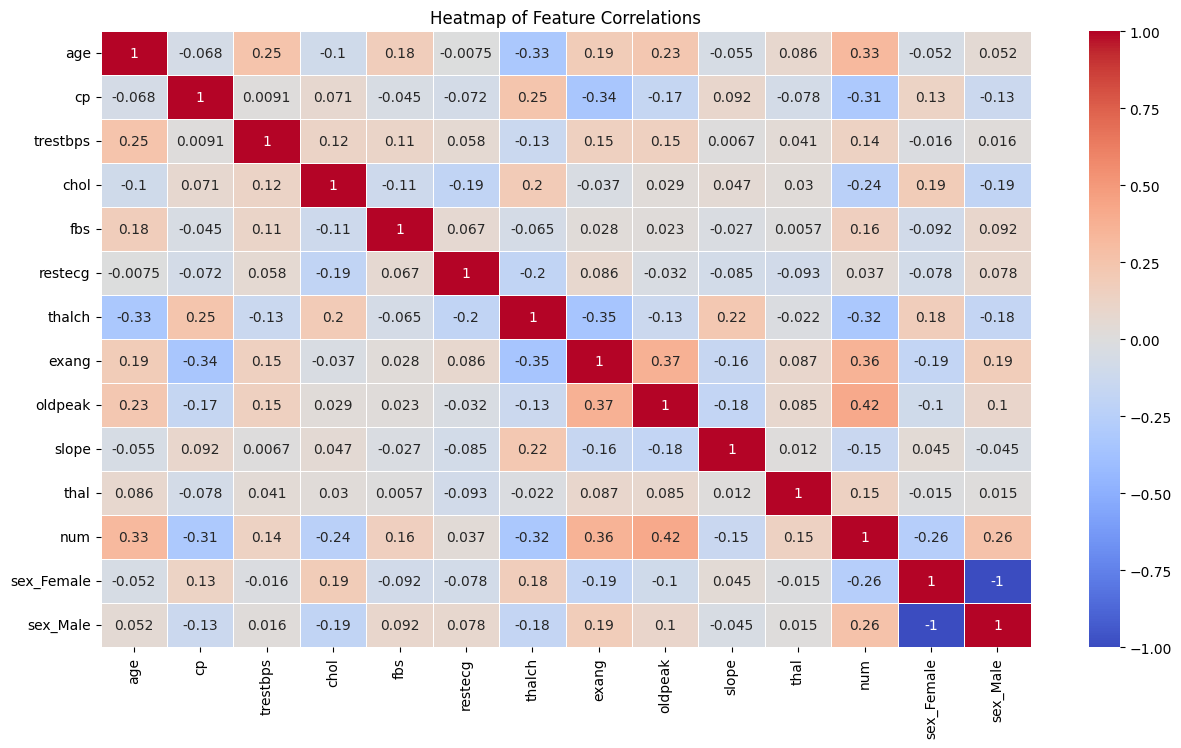

In [ ]:
correlation_matrix = heart_encoded.corr()

# Create the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

- Let's check for the and numerical tranformation is needed by checking the skewness of the data

In [ ]:
heart_encoded.skew()
# here we should be checking for the numerical data rather than the encoded and labeled data

age          -0.136797
cp            0.795836
trestbps      0.353650
chol         -0.564766
fbs           1.473485
restecg       0.007213
thalch       -0.219555
exang         0.363247
oldpeak       1.058357
slope        -0.214870
thal         -0.314490
num           0.951409
sex_Female    1.431902
sex_Male     -1.431902
dtype: float64

In [ ]:
heart_new=heart_encoded.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical features
numerical_features = heart_new.select_dtypes(include=['int64', 'float64']).columns

# Apply Standard Scaling
scaler_standard = StandardScaler()
heart_standard_scaled = heart_new.copy()
heart_standard_scaled[numerical_features] = scaler_standard.fit_transform(heart_new[numerical_features])

# Display the first few rows of the scaled datasets
#df_standard_scaled_head
heart_standard_scaled.head()

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,sex_Female,sex_Male
0,1.006027,2.320276,0.567394,0.281297,1.976894,-1.561352,0.524183,-0.834983,1.334996,-1.672770,-1.556536,-0.881977,-0.514416,0.514416
1,-1.397560,0.232258,0.076967,0.013526,-0.505844,0.013879,-0.147705,-0.834983,-0.844594,-0.224843,-1.556536,-0.881977,-0.514416,0.514416
2,0.350503,-0.811752,0.322181,-0.084656,-0.505844,0.013879,0.449529,-0.834983,-0.465535,-0.224843,-1.556536,-0.881977,-0.514416,0.514416
3,-0.195767,2.320276,-0.756760,-0.138211,-0.505844,-1.561352,2.017268,-0.834983,-0.844594,-0.224843,-1.556536,-0.881977,-0.514416,0.514416
4,0.350503,-0.811752,-1.149102,-0.004325,-0.505844,0.013879,-0.371668,1.197629,0.576878,-0.224843,-1.556536,-0.881977,-0.514416,0.514416


In [ ]:
heart_standard_scaled.skew()

age          -0.136797
cp            0.795836
trestbps      0.353650
chol         -0.564766
fbs           1.473485
restecg       0.007213
thalch       -0.219555
exang         0.363247
oldpeak       1.058357
slope        -0.214870
thal         -0.314490
num           0.951409
sex_Female    1.431902
sex_Male     -1.431902
dtype: float64

In [ ]:
# Apply Min-Max Scaling
scaler_min_max = MinMaxScaler()
heart_min_max_scaled = heart_new.copy()
heart_min_max_scaled[numerical_features] = scaler_min_max.fit_transform(heart_new[numerical_features])

#df_min_max_scaled_head =
heart_min_max_scaled.head()

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,sex_Female,sex_Male
0,0.708333,1.000000,0.725,0.386401,1.0,0.0,0.633803,0.0,0.556818,0.0,0.0,0.0,0.0,1.0
1,0.250000,0.333333,0.675,0.336650,0.0,0.5,0.507042,0.0,0.295455,0.5,0.0,0.0,0.0,1.0
2,0.583333,0.000000,0.700,0.318408,0.0,0.5,0.619718,0.0,0.340909,0.5,0.0,0.0,0.0,1.0
3,0.479167,1.000000,0.590,0.308458,0.0,0.0,0.915493,0.0,0.295455,0.5,0.0,0.0,0.0,1.0
4,0.583333,0.000000,0.550,0.333333,0.0,0.5,0.464789,1.0,0.465909,0.5,0.0,0.0,0.0,1.0


In [ ]:
heart_min_max_scaled.skew()

age          -0.136797
cp            0.795836
trestbps      0.353650
chol         -0.564766
fbs           1.473485
restecg       0.007213
thalch       -0.219555
exang         0.363247
oldpeak       1.058357
slope        -0.214870
thal         -0.314490
num           0.951409
sex_Female    1.431902
sex_Male     -1.431902
dtype: float64

- As we know ,  for Right Skewed data we use **Log Tranformation**, lets apply log tranformation for the data

In [ ]:

# Identify skewed features
skewed_features = heart_new.select_dtypes(include=['number']).apply(lambda x: x.skew()).sort_values(ascending=False)

# Apply log transformation to the most skewed feature
skewed_feature = skewed_features.index[2]
heart_new[skewed_feature + '_log'] = np.log1p(heart_new[skewed_feature])


In [ ]:
heart_new.head()

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,sex_Female,sex_Male,oldpeak_log
0,63,3,145,233,1,0,150,0,2.3,0,0,0,0,1,1.193922
1,41,1,135,203,0,1,132,0,0.0,1,0,0,0,1,0.000000
2,57,0,140,192,0,1,148,0,0.4,1,0,0,0,1,0.336472
3,52,3,118,186,0,0,190,0,0.0,1,0,0,0,1,0.000000
4,57,0,110,201,0,1,126,1,1.5,1,0,0,0,1,0.916291


In [ ]:
heart_new.isnull().sum()

age            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalch         0
exang          0
oldpeak        0
slope          0
thal           0
num            0
sex_Female     0
sex_Male       0
oldpeak_log    4
dtype: int64

In [ ]:
heart_final = heart_new.dropna()

In [ ]:
#float64_cols = heart_final.select_dtypes(include=['float64']).columns
#heart_final[float64_cols] = heart_final[float64_cols].astype('float32')

heart_final[np.abs(heart_final) > np.finfo(np.float32).max] = np.nan

In [ ]:
heart_final.info(0)

<class 'pandas.core.frame.DataFrame'>
Index: 904 entries, 0 to 907
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          904 non-null    int64  
 1   cp           904 non-null    int64  
 2   trestbps     904 non-null    int64  
 3   chol         904 non-null    int64  
 4   fbs          904 non-null    int64  
 5   restecg      904 non-null    int64  
 6   thalch       904 non-null    int64  
 7   exang        904 non-null    int64  
 8   oldpeak      904 non-null    float64
 9   slope        904 non-null    int64  
 10  thal         904 non-null    int64  
 11  num          904 non-null    int64  
 12  sex_Female   904 non-null    int64  
 13  sex_Male     904 non-null    int64  
 14  oldpeak_log  902 non-null    float64
dtypes: float64(2), int64(13)
memory usage: 113.0 KB


In [ ]:
final_data = heart_final.dropna()

### Decision Tree Classification:

- here we are doing the decision tree classification for the heart_new data whic is copyed into final _data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the dataset
X = final_data.drop('num', axis=1)  # assuming 'target' is the column name for labels
y = final_data['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
clf = DecisionTreeClassifier(random_state=42)



In [ ]:
X_train.head()

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,sex_Female,sex_Male,oldpeak_log
10,30,3,170,237,0,2,170,0,0.000000,0,0,1,0,0.000000
376,59,0,154,0,0,2,131,1,1.500000,2,1,0,1,0.916291
248,58,0,100,213,0,2,110,0,0.000000,1,2,0,1,0.000000
389,61,1,179,283,0,1,92,1,0.891253,1,2,0,1,0.637240
434,59,3,134,204,0,1,162,0,0.800000,2,1,0,1,0.587787


In [ ]:
X_train.isnull().sum()

age            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalch         0
exang          0
oldpeak        0
slope          0
thal           0
sex_Female     0
sex_Male       0
oldpeak_log    0
dtype: int64

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 721 entries, 10 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          721 non-null    int64  
 1   cp           721 non-null    int64  
 2   trestbps     721 non-null    int64  
 3   chol         721 non-null    int64  
 4   fbs          721 non-null    int64  
 5   restecg      721 non-null    int64  
 6   thalch       721 non-null    int64  
 7   exang        721 non-null    int64  
 8   oldpeak      721 non-null    float64
 9   slope        721 non-null    int64  
 10  thal         721 non-null    int64  
 11  sex_Female   721 non-null    int64  
 12  sex_Male     721 non-null    int64  
 13  oldpeak_log  721 non-null    float64
dtypes: float64(2), int64(12)
memory usage: 84.5 KB


In [ ]:
# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

In [ ]:
average_method = 'macro'
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=average_method)
recall = recall_score(y_test, y_pred, average=average_method)
f1 = f1_score(y_test, y_pred, average=average_method)
#roc_auc = roc_auc_score(y_test, y_pred,average=average_method)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr', average='macro')
# Display evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC-AUC: {roc_auc}')






Accuracy: 0.4696132596685083
Precision: 0.3133525183181934
Recall: 0.3154805438349742
F1-Score: 0.3130471836724448
ROC-AUC: 0.5837908215657425


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [ ]:
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

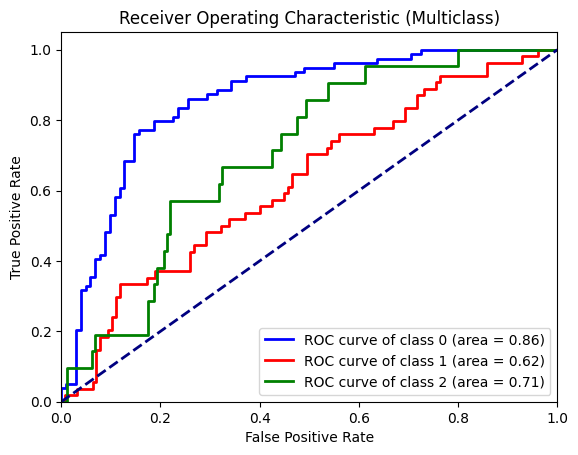

In [ ]:
# Predict probabilities
y_score = model.predict_proba(X_test)

# Binarize the output for ROC computation
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class %d (area = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Multiclass)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Initialize the best model
best_clf = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_best = best_clf.predict(X_test)

In [ ]:
y_test.shape

(181,)

In [ ]:
y_pred_best.shape

(181,)

In [ ]:
y_test = np.array(y_test)
y_pred_best = np.array(y_pred_best)

In [ ]:
print(y_test.shape)
print(y_pred_best.shape)

(181,)
(181,)


In [ ]:
y_test = y_test.flatten()
y_pred_best = y_pred_best.flatten()

In [ ]:
# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='macro')
recall_best = recall_score(y_test, y_pred_best, average='macro')
f1_best = f1_score(y_test, y_pred_best, average='macro')
roc_auc_best = roc_auc_score(y_test, best_clf.predict_proba(X_test), multi_class='ovr', average='macro')

# Display evaluation metrics of the best model
print(f'Best Parameters: {best_params}')
print(f'Best Accuracy: {accuracy_best}')
print(f'Best Precision: {precision_best}')
print(f'Best Recall: {recall_best}')
print(f'Best F1-Score: {f1_best}')
print(f'Best ROC-AUC: {roc_auc_best}')

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Best Accuracy: 0.4696132596685083
Best Precision: 0.2710811206202911
Best Recall: 0.2761523005826803
Best F1-Score: 0.2695896364867916
Best ROC-AUC: 0.5995830953481013


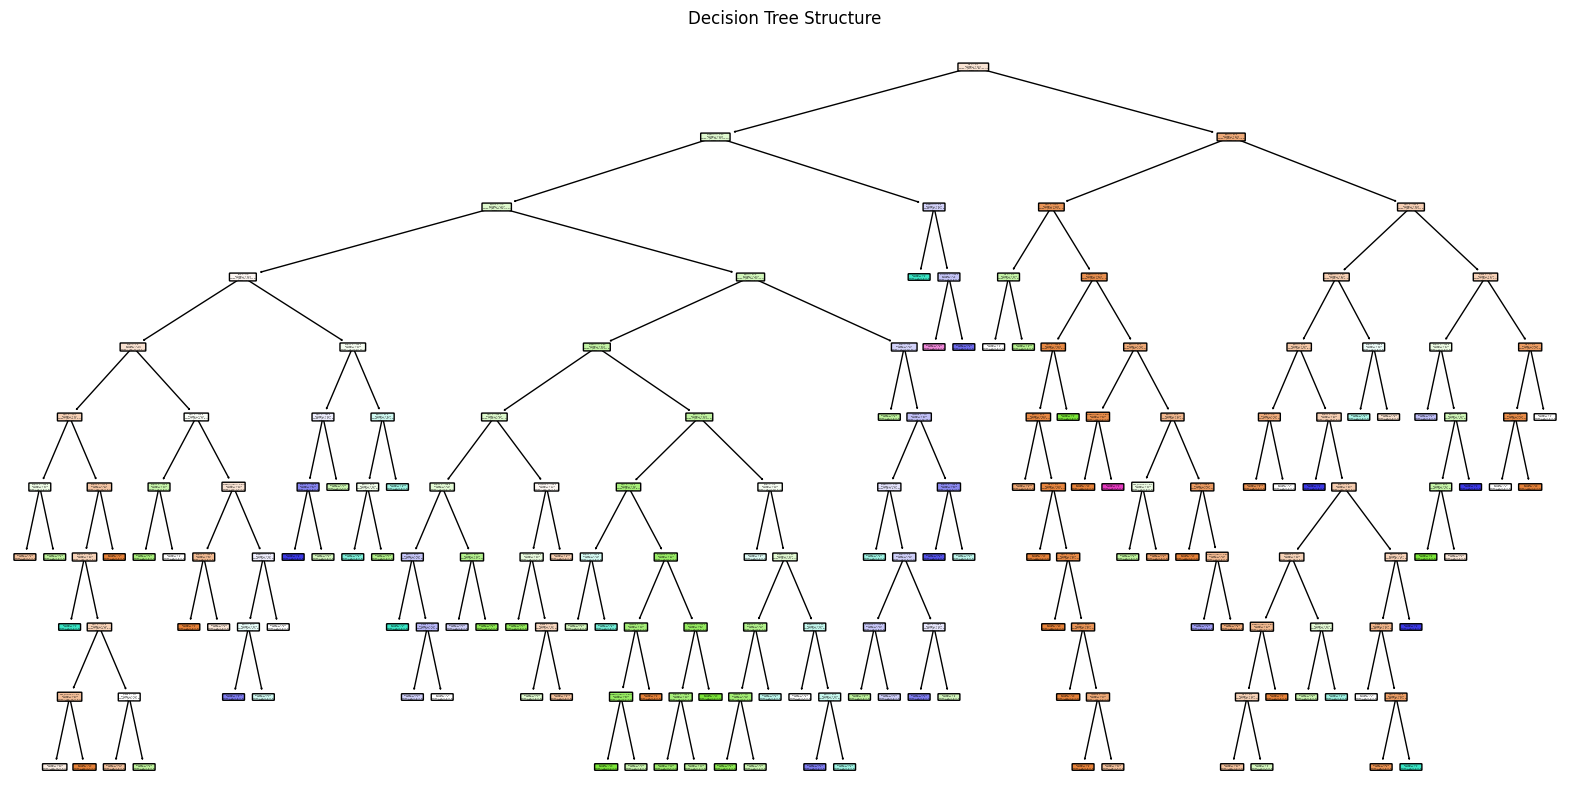

In [ ]:
# Plot the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=best_clf.classes_.astype(str), rounded=True)
plt.title('Decision Tree Structure')
plt.show()

In [ ]:
# Identify important features
feature_importances = best_clf.feature_importances_

In [ ]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


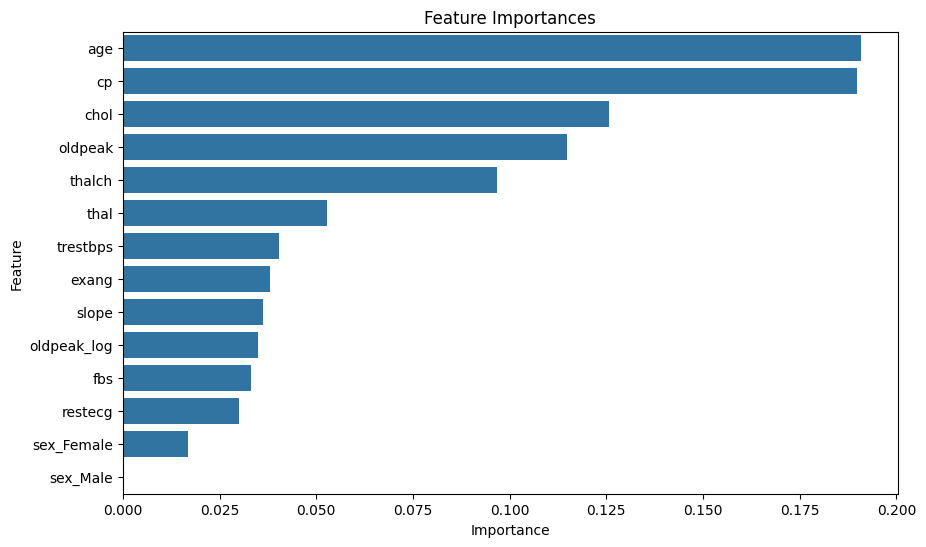

In [ ]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


Interview Questions:

1)What are some common hyperparameters of decision tree models and how do they affect the model's performance?

- Common hyperparameters of decision tree models include:

  - max_depth: Limits the maximum depth of the tree. Prevents overfitting by restricting how deep the tree can grow.
  - min_samples_split: The minimum number of samples required to split an internal node. A higher value can prevent the model from learning overly specific patterns, reducing overfitting.
  - min_samples_leaf: The minimum number of samples required to be at a leaf node. Helps in preventing overfitting by ensuring that leaf nodes have a sufficient number of samples.
  - criterion: The function to measure the quality of a split (e.g., 'gini' for Gini impurity, 'entropy' for information gain). Different criteria can lead to different splits and thus affect the structure of the tree.




2)What is the difference between Label encoding and One-hot encoding?

- Label Encoding:
  - Transforms categorical variables into numeric values by assigning a unique integer to each category.
  - It is useful when there is an ordinal relationship between categories. However, it can introduce unintended ordinal relationships if used on nominal data.
- One-Hot Encoding:
  - Creates binary columns for each category of a categorical variable. Each column represents one category, and a value of 1 indicates the presence of that category.
  -  It is useful for nominal data where there is no ordinal relationship between categories.